In [2]:
import pandas as pd
import joblib

In [17]:
df = pd.read_excel('../data/jsl_index1.xlsx',index_col='date')

In [18]:
df.head()


,index
date,
2022-01-20,2058.718
2022-01-19,2072.500
2022-01-18,2073.101
2022-01-17,2074.948
2022-01-14,2051.114


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 978 entries, 2022-01-07 to 2017-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   978 non-null    float64
dtypes: float64(1)
memory usage: 15.3 KB


In [12]:
joblib.dump(df,'jslindex.job') # 保存

['jslindex.job']

In [13]:
df.head()

,value
date,
2022-01-17,2074.948
2022-01-14,2051.114
2022-01-13,2068.489
2022-01-12,2083.196
2022-01-11,2063.531


In [80]:
indexs=df['index'].values

In [15]:
len(v)

984

In [16]:
v[0]

2074.948

In [81]:
indexs=indexs[::-1]

In [ ]:
indexs

In [18]:
v[0]

1000.0

In [32]:
df.iloc[len(df)-898]

index    1919.359
Name: 2021-09-07 00:00:00, dtype: float64

In [75]:
def get_max_withdraw(indexs):
    max_withdraw = 0
    max_date_index =0
    last_high = indexs[0]
    
    for index,current in enumerate(indexs):
        # 遍历所有数据
        if current>last_high:
            last_high=current
            continue

        if (last_high-current)/last_high>max_withdraw:
            # 找到一个最大值时，保存其位置
            max_withdraw = (last_high-current)/last_high
            max_date_index=index

    return max_withdraw*100,max_date_index # 变成百分比


In [73]:
x=[9, 2, 5, 1, 8, 5, 9, 2, 1]

In [82]:
get_max_withdraw(indexs)

(12.013742567571798, 755)

In [51]:
type(v[-1])

numpy.float64

In [6]:
url='https://www.jisilu.cn/data/cbnew/cb_index/'
df = pd.read_html(url,header=0)

In [11]:
df[0]

,日期,指数,涨跌,涨幅,平均价格(元),中位数价格(元),平均双低,平均溢价率,平均收益率,成交额(亿元),剩余规模(亿元),换手率,数量,<90,90-100,100-110,110-120,120-130,≥130
0,数据范围： 全部 一月 半年 一年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,编制规则说明 1、等权纳入全部上市交易的转债为成份； 2、2017-12-29日为基准日，...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,指数历史 日期 指数 涨跌 涨幅 平均价格(元) 中位数价格(元) 平均双低 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
max_draw_down =0
returns=indexs
temp_max_value=0 
for i in range(1, len(returns)):

    temp_max_value= max(temp_max_value, returns[i-1])

    max_draw_down= min(max_draw_down, returns[i]/temp_max_value-1)
    
print(str(max_draw_down))

-0.12013742567571795


In [35]:

rollMax = df['index'].cummax()
drawDown = df['index']/rollMax - 1.0
maxDrawDown = drawDown.cummin() 

In [36]:
maxDrawDown

date
2022-01-20    0.000000
2022-01-19    0.000000
2022-01-18    0.000000
2022-01-17    0.000000
2022-01-14   -0.011487
                ...   
2018-01-05   -0.551413
2018-01-04   -0.551413
2018-01-03   -0.551413
2018-01-02   -0.551413
2017-12-29   -0.551413
Name: index, Length: 987, dtype: float64

In [37]:
import numpy as np
def MaxDrawdown(return_list):
    '''最大回撤率'''
    '''
    return_list：是每日资金的变化曲线
    np.maximum.accumulate(return_list)：找到return_list中的累计最大值，例如：
    d = np.array([2, 0, 3, -4, -2, 7, 9])
	c = np.maximum.accumulate(d)
	#c = array([2, 2, 3, 3, 3, 7, 9])
	i：为最大回撤截止的时间
	j：为最大回撤开始的时间
	drawdown_max：最大回撤
	drawdown_rate：最大回撤对应的回撤率
	drawdown_tian：回撤持续天数
    '''
    i = np.argmax((np.maximum.accumulate(return_list) - return_list))
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    drawdown_max = return_list[j] - return_list[i]
    drawdown_rate = (return_list[j] - return_list[i]) / return_list[j]
    drawdown_tian = i - j
    
    return drawdown_rate, drawdown_max, drawdown_tian, j, i


In [78]:
MaxDrawdown(indexs)

(0.5514133736128781, 1152.1220000000003, 782, 12, 794)

In [83]:
df.iloc[len(df)-755]

index    1430.23
Name: 2021-02-04 00:00:00, dtype: float64

In [63]:
import random
sum =1
result=[]
for i in range(500):
    t = random.random()-0.5
    sum+=t
    result.append(sum)


In [66]:
get_max_withdraw(result)

253


339.8282155365848

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

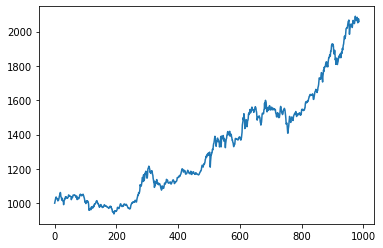

In [84]:
plt.plot(list(range(len(indexs))),indexs)

In [70]:
MaxDrawdown(result)

(3.398282155365848, 7.574599479897417, 234, 19, 253)

In [62]:
result

[1.7257440455151247,
 2.4957952419555984,
 3.119034021593068,
 3.834333917499319,
 4.666385017051712,
 5.466604847079309,
 6.175389368575474,
 6.442932844248702,
 6.901023813433907,
 6.918983046960974,
 7.169387557864371,
 8.137236913186626,
 8.639890357359956,
 9.334601326126302,
 9.685833749905965,
 10.324801836650058,
 10.921950202340385,
 11.267587374381275,
 11.809836275986706,
 12.038576414157426,
 12.57617699964692,
 12.603810273008868,
 12.884075621573583,
 13.703821513185682,
 14.669109397349416,
 15.420358126247516,
 15.447965968359515,
 16.33773142457511,
 16.826951294404925,
 17.552328377670385,
 18.17384247201084,
 18.767753730220214,
 18.813726623229552,
 19.744389685091207,
 19.777600679150694,
 20.710846696594853,
 21.13730102281127,
 21.411130795234214,
 21.56258546809529,
 21.803780944499064,
 22.334208670661752,
 22.97252750651996,
 23.017954379673615,
 23.477549682704804,
 23.94710252307766,
 24.113604413730275,
 25.103717857994763,
 25.755245784559705,
 25.82893844